Ez a projekt az éttermi tippek adatkészletét fogja használni a kompozíciós parcellák és vizualizációk gyakorlására. Megvizsgáljuk a változók és a kapott tipp közötti kapcsolatot.

Az általunk használt adatkészlet 244 éttermi számlából származó adatok gyűjteménye, amelyeket az Egyesült Államokban gyűjtöttek össze 1987-ben.

Információkat tartalmaz az étterem személyzetének adott borravalókról, például a teljes számla, borravaló összege, a számlát fizető személy neme, dohányzott-e vagy sem, a hét napja, a napszak és a a párt mérete.


In [1]:
import pandas as pd
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

tips_df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv')

In [2]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


Mint látható, minden megfigyelés egy olyan vásárlót képvisel, aki borravalót hagyott egy étteremben.

Információkat láthatunk a történtek napjáról, hogy ebédnél vagy vacsoránál, az eladások számát, a borravalót elhagyó nemét és azt, hogy dohányzott-e vagy sem.

Mielőtt folytatná, nézzen meg néhány sort az adatokból, és használja az információkat és leírást az adatkészlet oszloptípusainak és értékeinek elemzéséhez.

#### Dohányzó emberek adnak több tippet?

Nincs bizonyíték arra, hogy a dohányosok több borravalót adnak, mint a nemdohányzók. De próbáljuk meg elemezni, mit mondanak az adataink.

Ebben a feladatban kördiagramot kell készítenie az éttermekben tippeket adó dohányosok és nemdohányzók arányával.

A kördiagramnak:

     Készítsen egy smokers_count sorozat adataiból
     Legyen a tippek aránya a dohányos állapot címe szerint
     Minden éken legyen látható százalékos érték
     Van egy címkéje az Is dohányossal? érték

Például a kívánt kimeneti diagramnak így kell kinéznie:

<img src="c-01.png">

Készítsen kördiagramot, amely megmutatja a dohányzó és nemdohányzó emberek arányát, akik tippeket adnak

Készítse el a kördiagramot, és ha kész, mentse el a tips_by_smokers_chart változóba, és érvényesítse a következő gombbal.

    Fontos! interaktívan ellenőrizzük, hogy a dohányzók_száma és a tips_by_smokers_chart változók a helyes információkat tartalmazzák-e?

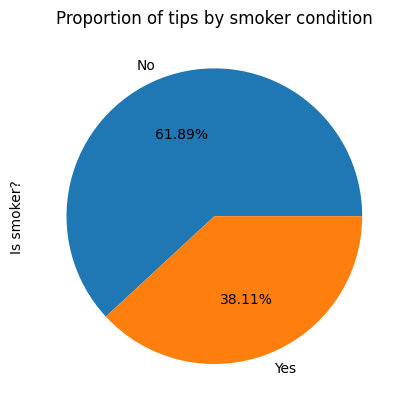

In [4]:
smokers_count = tips_df['smoker'].value_counts()

tips_by_smokers_chart = smokers_count.plot(kind="pie",
                                           label="Is smoker?",
                                           title="Proportion of tips by smoker condition",
                                           autopct='%1.2f%%')


In [5]:
smokers_count

smoker
No     151
Yes     93
Name: count, dtype: int64

Készítsen kördiagramot, amely megmutatja a férfiak és nők által adott tippek arányát

Hozza létre a kördiagramot, és ha kész, mentse el egy sex_proportion_chart változóba, és érvényesítse a következő gombbal.

A kördiagramnak:

     Építsen egy tips_by_sex_count sorozat adataiból
     A cím : "Proportion of tips by sex title"
     Minden éken legyen látható százalékos érték
     Legyen egy címkéje a Sex értékkel


    Fontos! interaktívan ellenőrizzük, hogy a tips_by_sex_count és sex_proportion_chart változói a megfelelő információkat tartalmazzák-e

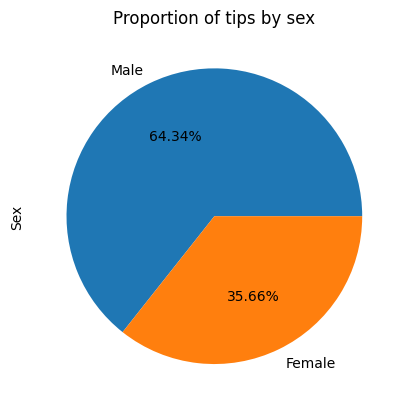

In [6]:
tips_by_sex_count = tips_df['sex'].value_counts()


sex_proportion_chart = tips_by_sex_count.plot(kind="pie",
                                           label="Sex",
                                           title="Proportion of tips by sex",
                                           autopct='%1.2f%%')

Teljes számla és borravaló összege nemenként

Ebben a feladatban egy halmozott oszlopdiagramot kell létrehoznia a férfiak és nők teljes számláinak és borravalóinak összegével.

A halmozott oszlopdiagramnak:

     Építsen egy tip_amount_by_sex DataFrame-ből származó adatok felhasználásával
     Tips and total bill amounts by sex legyen a cím
     Férfi vagy női értékek legyenek az X tengelyen
     Az Y tengelyen az Összes számlák és borravalók értékei legyenek
     Az egymásra helyezett sávokon látható
     A szex legyen az X címke értéke
     Az Amount legyen az Y címke értéke


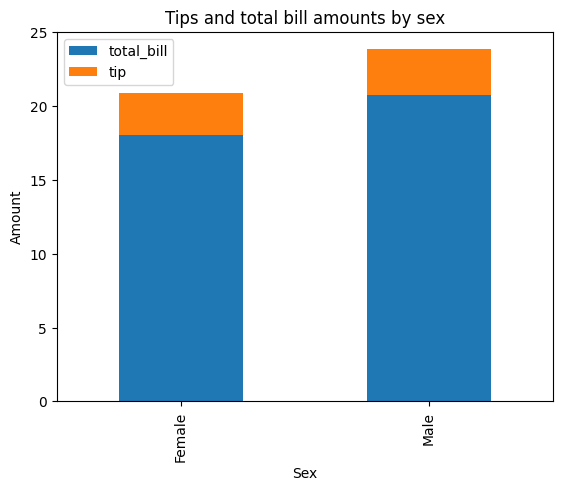

In [7]:
tip_amount_by_sex = tips_df.loc[:, ["sex", "total_bill", "tip"]].groupby("sex").mean().reset_index()

tips_by_sex_chart = tip_amount_by_sex.plot(kind="bar",
                                           x="sex",
                                           y=["total_bill", "tip"],
                                           stacked=True,
                                           xlabel="Sex",
                                           ylabel="Amount",
                                           title="Tips and total bill amounts by sex")


A legjobb tippek szombat estére?

Ebben a feladatban egy kördiagramot kell készítenie a megadott tippek arányaival a hét napjánként.

A kördiagramnak:

     Építsen a daily_tips sorozat adataiból
     Legyen napi tippek címe
     Minden éken legyen látható százalékos érték
     Legyen egy címkéje a hét napja értékkel

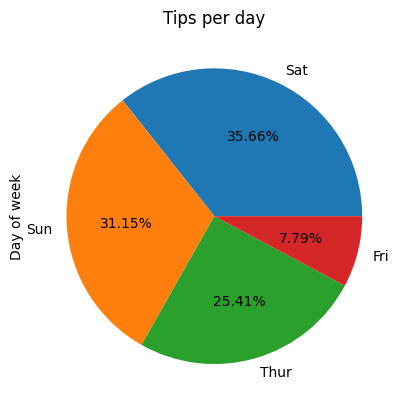

In [8]:
daily_tips = tips_df['day'].value_counts()

daily_tips_chart = daily_tips.plot(kind="pie",
                                   label="Day of week",
                                   title="Tips per day",
                                   autopct='%1.2f%%')


Teljes számla és borravaló összeg a hét napján

A következő feladathoz egy vízszintes halmozott oszlopdiagramot kell készítenie, amely tartalmazza a teljes számlák és borravalók összegét a hét napján.

A halmozott oszlopdiagramnak:

     A daily_mean DataFrame-ből származó adatok felhasználásával készülhet
     Legyen egy Tippek és teljes számlaösszeg a hét napjánként címmel
     Legyen tippek és teljes számlaösszeg az X tengelyen
     A hét napjának értékei legyenek az Y tengelyen
     Minden napnak saját vízszintes sávnak kell lennie
     A borravalók és a teljes számlaösszeg legyen az X címke értéke
     A Day legyen az Y címke értéke

     Légy óvatos! Vízszintes halmozott oszlopdiagramokon az adatértékek X és Y adattengelye megfordul.

Mivel a napoknak van sorrendje, a nap oszlopot Kategorikusként kell elemeznie. Ehhez használhatja a következő kódot:

In [9]:
from pandas.api.types import CategoricalDtype

day_of_week_order = CategoricalDtype(
    ['Thur', 'Fri', 'Sat', 'Sun'],
    ordered=True
)

tips_df['day'] = tips_df['day'].astype(day_of_week_order)


    1. megjegyzés: interaktívan ellenőrizzük, hogy a daily_mean és a tips_by_day_chart változói a megfelelő információkat tartalmazzák-e

    2. megjegyzés: győződjön meg arról, hogy lefuttatta a fenti kódot, amely a nap oszlopot Kategorikus típusúvá alakítja

C:\Users\chris\AppData\Local\Temp\ipykernel_35376\1502885721.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daily_mean = tips_df.loc[:, ["day", "total_bill", "tip"]].groupby("day").mean().reset_index()


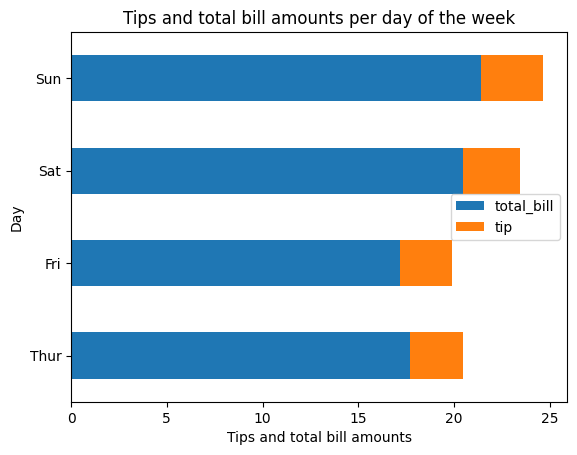

In [10]:
daily_mean = tips_df.loc[:, ["day", "total_bill", "tip"]].groupby("day").mean().reset_index()

tips_by_day_chart = daily_mean.plot(kind="barh",
                                    x="day",
                                    y=["total_bill", "tip"],
                                    stacked=True,
                                    xlabel="Tips and total bill amounts",
                                    ylabel="Day",
                                    title="Tips and total bill amounts per day of the week")


Vannak jobb tippek nappal vagy éjszaka?

Ebben a feladatban halmozott oszlopdiagramot kell készítenie a teljes számlák és borravalók összegével a napszakban - ebéd vagy vacsora -.

A halmozott oszlopdiagramnak:

     Készítsen egy dinner_lunch_df DataFrame-ből származó adatok felhasználásával
     Total bills and tips amount per moment of the day legyen a cím
     Legyen a nap pillanata - ebéd vagy vacsora - az X tengelyen
     Az Y tengelyen az Összes számlák és borravalók értékei legyenek
     Az egymásra helyezett sávokon látható
     Legyen ideje az X címke értékén
     Az Y címke értékén szerepeljen az Összeg

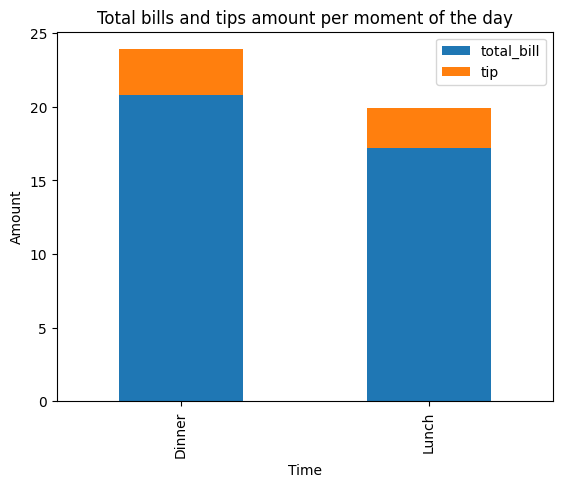

In [11]:
dinner_lunch_df = tips_df.loc[:, ["time", "total_bill", "tip"]].groupby('time').mean(numeric_only=True).reset_index()

dinner_lunch_chart = dinner_lunch_df.plot(kind="bar",
                                          x="time",
                                          y=["total_bill", "tip"],
                                          stacked=True,
                                          xlabel="Time",
                                          ylabel="Amount",
                                          title="Total bills and tips amount per moment of the day")
